# **Personal Details**
**Full name**: Konstantinos Gerogiannis  
**Studies**: Electrical and Computer Engineering, AUTh  
**AEM**: 9638  
**Email**: kostas.gerogiannis04@gmail.com



## **Summary**
In this colab, we are comparing the accuracy between the following list of classifiers:  
1. KNN classifier (k nearest neighbours) with k=1  
2. KNN classifier (k nearest neighbours) with k=3  
3. Nearest Centroid classifier  

The code below is written in python 3.  

The chosen dataset is named MNIST.  
MNIST is a famous dataset that contains a variety of handwritten digits from 0 to 9 and it's used to train and test our models. More information about the used dataset can be found here: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

### **Get MNIST Dataset from Web**

First, we get the dataset from the above website, using python's _urllib_ library.  
These 4 files are getting stored in this colab temporary, until it is closed.

In [2]:
import urllib.request
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')


('t10k-labels-idx1-ubyte.gz', <http.client.HTTPMessage at 0x7fab0707a760>)

The files we get from the website are compressed, so in this step we use _gzip_ library to extract them and copy their data in 4 new files (unzipped).  

In [3]:
import gzip
import shutil

with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('train-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('train-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f_in:
    with open('t10k-images-idx3-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f_in:
    with open('t10k-labels-idx1-ubyte', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

1. Remove the zip files (optional)  
2. Make sure that we have installed idx2numpy package that we will use later

In [4]:
!rm 'train-images-idx3-ubyte.gz'
!rm 'train-labels-idx1-ubyte.gz'
!rm 't10k-images-idx3-ubyte.gz'
!rm 't10k-labels-idx1-ubyte.gz'

!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=e7a103dadea3ac46d1184756305f96115e133b60dc73a21f20ce0dceacbf8b68
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


### **Import required libraries, create train and test arrays**

In [5]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

(Optional)  
To test that we have retrieve our data as we wished, we can print the labels of train set, or we can select an image and plot it.

       0
0      5
1      0
2      4
3      1
4      9
...   ..
59995  8
59996  3
59997  5
59998  6
59999  8

[60000 rows x 1 columns]


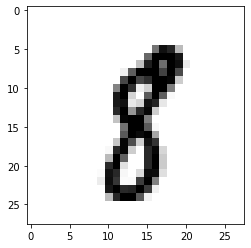

In [6]:
print(pd.DataFrame(train_labels))
plt.imshow(train_images[300], cmap = plt.cm.binary)

The numpy arrays that we have already created have 3 dimensions: (N,28,28)  
* N is the number of images
* (28x28) is the dimensions of each image

In order to use the classifiers we wish, we will reshape the above arrays,  
from 3 dimensions to 2. (we will flatten each image from 2D to 1D)

In [7]:
dims = np.shape(train_images)
X_train = train_images.reshape(dims[0],dims[1]*dims[2])
y_train = train_labels

dims = np.shape(test_images)
X_test = test_images.reshape(dims[0],dims[1]*dims[2])
y_test = test_labels

### **Create classifiers, test model's accuracy**


To make our lives easier, we use the functions provided by the python's library _sklearn_ and we import them. N_JOBS is a parameter used for maximum 
parallelism (quicker results). We create 3 classifiers, those that we have already mentioned and for each one of them, we fit the data of the train sets and after that we use our models to predict the output. Finally, we simply use accuracy score as our metric to compare the 3 different classifiers.

In [8]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score
N_JOBS = -1

# Let's try with 1 only neighbour
start = time.time()
knn_cls = KNeighborsClassifier(n_neighbors=1,weights='distance',n_jobs=N_JOBS)
knn_cls.fit(X_train,y_train)
y_predict = knn_cls.predict(X_test)
print("KNN CLASSIFIER WITH k=1")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"%(time.time()-start))

# And now with 3 neighbours
start = time.time()
knn_cls2 = KNeighborsClassifier(n_neighbors=3,weights='distance',n_jobs=N_JOBS)
knn_cls2.fit(X_train,y_train)
y_predict = knn_cls2.predict(X_test)
print("KNN CLASSIFIER WITH k=3")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"%(time.time()-start))

# Finally, we will see the results using the nearest centroid classifier
start = time.time()
cls3 = NearestCentroid()
cls3.fit(X_train,y_train)
y_predict = cls3.predict(X_test)
print("NEAREST CENTROID CLASSIFIER")
print("Model accuracy score: %.3f" % accuracy_score(y_test, y_predict))
print("Model total time: %.3f"%(time.time()-start))

KNN CLASSIFIER WITH k=1
Model accuracy score: 0.969
Model total time: 40.526
KNN CLASSIFIER WITH k=3
Model accuracy score: 0.972
Model total time: 48.351
NEAREST CENTROID CLASSIFIER
Model accuracy score: 0.820
Model total time: 0.136


### **Results**
The results from the above comparison can be summed up in the following table:

|  Classifier     | Accuracy score | Total time (sec)|
| :-----------:   | :-----------:  | :-------:|
| KNN with k=1    | 0.969          |40.5|
| KNN with k=3    | 0.972          |48.4|
| Nearest Centroid| 0.820          |0.1|

As we can easily understand, nearest centroid is the less accurate between the 3 classifiers, because this classifier relies on the average pixel's intensity of the image. But the intensity can differ between images of the same digit, as the images are coming from handwritten digits, each digit is written different from person to person.

Between the KNN classifiers, we increase the number of neighbours and as we could predict, the accuracy also increases.